<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-et-initialisation" data-toc-modified-id="Import-et-initialisation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import et initialisation</a></span></li><li><span><a href="#Recency" data-toc-modified-id="Recency-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Recency</a></span></li><li><span><a href="#Frequency" data-toc-modified-id="Frequency-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Frequency</a></span></li><li><span><a href="#Monetary" data-toc-modified-id="Monetary-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Monetary</a></span></li><li><span><a href="#Satisfaction" data-toc-modified-id="Satisfaction-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Satisfaction</a></span></li><li><span><a href="#RFM" data-toc-modified-id="RFM-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>RFM</a></span></li><li><span><a href="#Transformation-et-scaling" data-toc-modified-id="Transformation-et-scaling-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Transformation et scaling</a></span></li><li><span><a href="#KMeans" data-toc-modified-id="KMeans-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>KMeans</a></span></li><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>DBSCAN</a></span></li><li><span><a href="#Bisecting-KMeans" data-toc-modified-id="Bisecting-KMeans-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Bisecting KMeans</a></span></li><li><span><a href="#GaussianMixture" data-toc-modified-id="GaussianMixture-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>GaussianMixture</a></span></li><li><span><a href="#Sélection-du-modèle" data-toc-modified-id="Sélection-du-modèle-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Sélection du modèle</a></span></li></ul></div>

## Import et initialisation

In [30]:
# Import usuels
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from sklearn.metrics import pairwise_distances, silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering, SpectralClustering, MiniBatchKMeans, DBSCAN, KMeans, BisectingKMeans
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [31]:
# Mise en place des dataframes
customers_df = pd.read_csv(
    "/Users/loicvalenti/Library/Mobile Documents/com~apple~CloudDocs/Formation Data Science/PROJECT 5/DATA/olist_customers_dataset.csv")
geo_df = pd.read_csv(
    "/Users/loicvalenti/Library/Mobile Documents/com~apple~CloudDocs/Formation Data Science/PROJECT 5/DATA/olist_geolocation_dataset.csv")
orderitem_df = pd.read_csv(
    "/Users/loicvalenti/Library/Mobile Documents/com~apple~CloudDocs/Formation Data Science/PROJECT 5/DATA/olist_order_items_dataset.csv")
orderpay_df = pd.read_csv(
    "/Users/loicvalenti/Library/Mobile Documents/com~apple~CloudDocs/Formation Data Science/PROJECT 5/DATA/olist_order_payments_dataset.csv")
orderreviews_df = pd.read_csv(
    "/Users/loicvalenti/Library/Mobile Documents/com~apple~CloudDocs/Formation Data Science/PROJECT 5/DATA/olist_order_reviews_dataset.csv")
orders_df = pd.read_csv(
    "/Users/loicvalenti/Library/Mobile Documents/com~apple~CloudDocs/Formation Data Science/PROJECT 5/DATA/olist_orders_dataset.csv")
products_df = pd.read_csv(
    "/Users/loicvalenti/Library/Mobile Documents/com~apple~CloudDocs/Formation Data Science/PROJECT 5/DATA/olist_products_dataset.csv")
sellers_df = pd.read_csv(
    "/Users/loicvalenti/Library/Mobile Documents/com~apple~CloudDocs/Formation Data Science/PROJECT 5/DATA/olist_sellers_dataset.csv")
categname_df = pd.read_csv(
    "/Users/loicvalenti/Library/Mobile Documents/com~apple~CloudDocs/Formation Data Science/PROJECT 5/DATA/product_category_name_translation.csv")

In [32]:
main_dataframe = orders_df.merge(customers_df, on="customer_id").merge(orderitem_df, on="order_id").merge(products_df, on="product_id").merge(
    categname_df, on="product_category_name").merge(orderpay_df, on="order_id").merge(sellers_df, on="seller_id").merge(orderreviews_df, on="order_id")

In [33]:
colonnes_dates = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
                  "order_delivered_customer_date", "order_estimated_delivery_date", "shipping_limit_date",
                  "review_creation_date", "review_answer_timestamp"]

for colonne in colonnes_dates:
    main_dataframe[colonne] = pd.to_datetime(
        main_dataframe[colonne])

In [34]:
main_dataframe.to_csv("main_dataframe_projet_5.csv", index= False)

## Recency

In [7]:
# Grouping du dernier achat de chaque customer_unique_id

df_recency = main_dataframe.groupby(by='customer_unique_id', as_index=False)[
    'order_purchase_timestamp'].max()


display(df_recency)

# Rename des catégories pour la lisibilité
df_recency.rename(
    columns={"order_purchase_timestamp": "DernierAchat"}, inplace=True)

df_recency["DernierAchat"] = df_recency["DernierAchat"].dt.date

recent_date = main_dataframe['order_purchase_timestamp'].dt.date.max()

# Soustraction pour obtenir la recency du dernier achat

df_recency['Recency'] = df_recency['DernierAchat'].apply(
    lambda x: (recent_date - x).days)

df_recency.describe()

customer_unique_id order_purchase_timestamp
0      0000366f3b9a7992bf8c76cfdf3221e2      2018-05-10 10:56:27
1      0000b849f77a49e4a4ce2b2a4ca5be3f      2018-05-07 11:11:27
2      0000f46a3911fa3c0805444483337064      2017-03-10 21:05:03
3      0000f6ccb0745a6a4b88665a16c9f078      2017-10-12 20:29:41
4      0004aac84e0df4da2b147fca70cf8255      2017-11-14 19:45:42
...                                 ...                      ...
93391  fffcf5a5ff07b0908bd4e2dbc735a684      2017-06-08 21:00:36
93392  fffea47cd6d3cc0a88bd621562a9d061      2017-12-10 20:07:56
93393  ffff371b4d645b6ecea244b27531430a      2017-02-07 15:49:16
93394  ffff5962728ec6157033ef9805bacc48      2018-05-02 15:17:41
93395  ffffd2657e2aad2907e67c3e9daecbeb      2017-05-02 20:18:45

[93396 rows x 2 columns]

Recency
count  93396.000000
mean     242.645349
std      153.165352
min        0.000000
25%      119.000000
50%      223.000000
75%      352.000000
max      729.000000

La médiane de recency est de 223, pour une moyenne de 242, l'écart type est plutôt élevé, à 153 jours. 

## Frequency

In [8]:
# Pour le calcul de la fréquence, un aggrège les customer_unique_id par nombre de commande, et non pas d'achat

frequency_df = main_dataframe.groupby(["customer_unique_id"]).agg(
    {"order_id": "nunique"}).reset_index()


# Rename des catégories pour la lisibilité

frequency_df.rename(columns={"order_id": "Frequency"}, inplace=True)

frequency_df.describe()

Frequency
count  93396.000000
mean       1.033406
std        0.208235
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       15.000000

Nous avons très largement qu'un achat par client. Cependant un client à achter 15 fois. L'écart-type est très faible, à 0.2. Nous avons donc un groupe de client qui n'achète qu'une fois, pour la très grande majorité.

## Monetary

In [9]:
# Ici nous groupons par rapport au total dépense par client

monetary_df = main_dataframe.groupby('customer_unique_id', as_index=False)[
    'payment_value'].sum()

monetary_df.columns = ['customer_unique_id', 'Monetary']

monetary_df.describe()

Monetary
count   93396.000000
mean      213.387431
std       631.534143
min         9.590000
25%        64.000000
50%       113.030000
75%       203.390000
max    109312.640000

La moyenne est a 213, et l'écart-type 631. La médianne paraît être un meilleur indicateur ici, à 113. L'amplitude est aussi très haute puisque le minimum est de 9 et le maximum de 109312.

## Satisfaction

In [10]:
# Ici nous trions par moyenne de score pour chaque client

satisfaction_df = main_dataframe.groupby('customer_unique_id', as_index=False)[
    'review_score'].mean()


satisfaction_df.columns = ['customer_unique_id', 'Review Score']


satisfaction_df.describe()

Review Score
count  93396.000000
mean       4.104413
std        1.324810
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000

La majorité des revues sont à 5/5.

## RFM

In [11]:
# Ici nous groupons les 4 tableaux entre eux successivement,
# afin de pouvoir commencer l'étape d'analyse et de clustering.

rf_df = df_recency.merge(frequency_df, on='customer_unique_id')
rfm_df = rf_df.merge(monetary_df, on='customer_unique_id').drop(
    columns="DernierAchat")
rfm_df = rfm_df.merge(satisfaction_df, on='customer_unique_id')
rfm_df.describe().T.style.background_gradient(
    subset=["mean"], cmap="coolwarm"
).background_gradient(subset=["std"], cmap="coolwarm").background_gradient(
    subset=["50%"], cmap="coolwarm"
)

<AxesSubplot:>

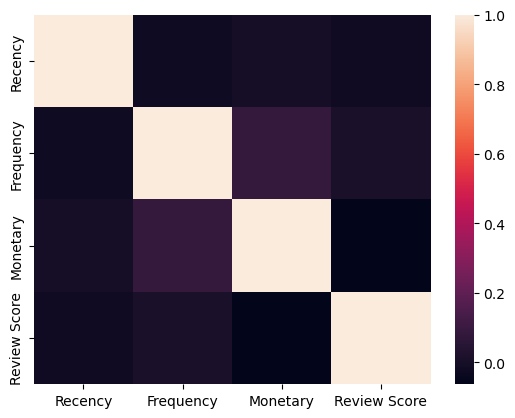

In [12]:
sns.heatmap(data=rfm_df.corr())

In [13]:
def tableau_clustering(df):
    # Cette fonction nous permet d'afficher les résultats du clustering facilement
    df_clustering = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'median',
        'Review Score': 'mean',
        'Monetary': ['mean', 'count']
    })

    return df_clustering

## Transformation et scaling

Les catégories bénéficient d'un passage au logarithme.

In [14]:
# Perform log transformation
rfm_df_log = rfm_df.drop(columns=["customer_unique_id"]).copy()

rfm_df_log["Monetary"] = np.log(rfm_df_log["Monetary"]+1)
rfm_df_log["Recency"] = np.log(rfm_df_log["Recency"]+1)
rfm_df_log["Frequency"] = np.log(rfm_df_log["Frequency"]+1)
rfm_df_log["Review Score"] = np.log(rfm_df_log["Review Score"]+1)

Ensuite, nous standardisons les données.

In [15]:
std_scaler = StandardScaler()
RFM_Table_scaled = std_scaler.fit_transform(rfm_df_log)

Et nous pouvons passer aux tests de clustering.

## KMeans

In [16]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

Recherche du nombre de clusters.

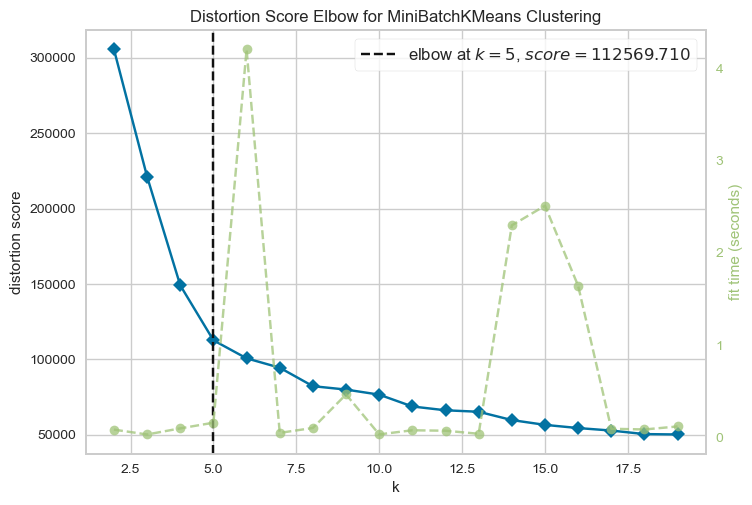

<AxesSubplot:title={'center':'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
model = MiniBatchKMeans()
visualizer = KElbowVisualizer(model, k=(2, 20))

visualizer.fit(RFM_Table_scaled)    # Fit the data to the visualizer
visualizer.poof()

Visualisation des silhouettes.

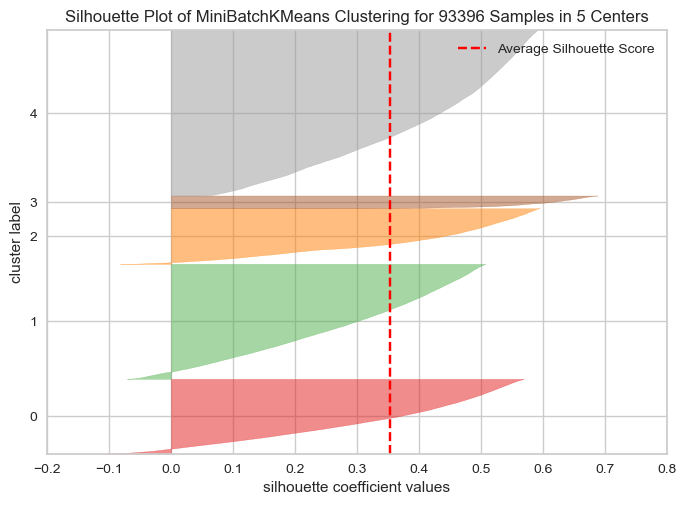

<AxesSubplot:title={'center':'Silhouette Plot of MiniBatchKMeans Clustering for 93396 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [18]:
model = MiniBatchKMeans(n_clusters=5)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(RFM_Table_scaled)
visualizer.poof()

Les silhouettes de clusters paraissent appropriées, sauf le cluster le plus fin qui doit être le cluster qui regroupe les fréquences supérieures à 1. En effet nous avons seulement 3% de données où la fréquence dépasse 1.

Nous calculons les 10000 premiers points de tsne pour les visualisations.

In [19]:
# Nous prenons un échantillion des données, pour éviter un temps de calcul absurde.
# De plus 10000 parait suffisant.
tsne = TSNE(n_components=2, perplexity=1000, n_iter=10000, init = 'pca').fit_transform(RFM_Table_scaled[:10000])

df = pd.DataFrame()
df["comp-1"] = tsne[:, 0]
df["comp-2"] = tsne[:, 1]

Recency Frequency Review Score    Monetary       
               mean    median         mean        mean  count
Cluster                                                      
0        299.743042       1.0     4.553732   74.423621  38804
1        225.648379       2.0     4.152209  488.145860   2807
2        279.406030       1.0     4.546899  427.022708  23348
3         50.660061       1.0     4.586868  143.109262  16197
4        249.458170       1.0     1.186520  276.413886  12240

Le score de silhouette est de :  0.3570743545923344


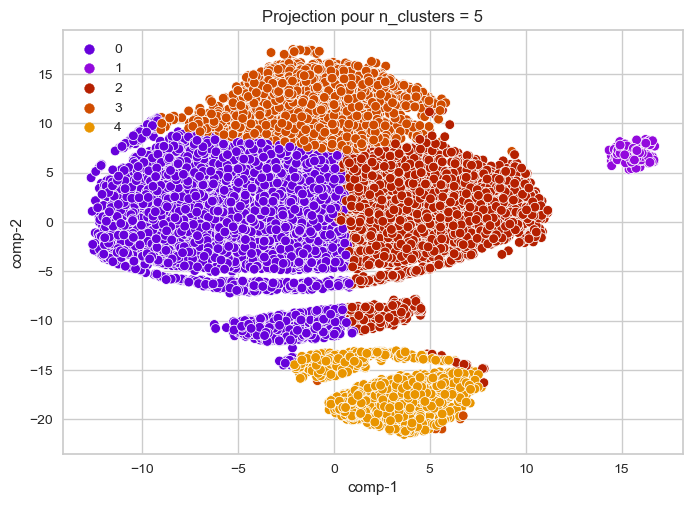

In [20]:
# Entrainement sur 5 clusters
kmean_model = KMeans(n_clusters=5)
kmean_y = kmean_model.fit_predict(RFM_Table_scaled)


# Création du tableau final
rfm_df_true = rfm_df.copy()
rfm_df_true['Cluster'] = kmean_y

# Affichage
display(tableau_clustering(rfm_df_true))


# Score silhouette

print("Le score de silhouette est de : ", silhouette_score(
    RFM_Table_scaled, kmean_y, metric='euclidean'))

# Visualisation
df["y"] = kmean_y[:10000]
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette(
    "gnuplot", rfm_df_true['Cluster'][:10000].unique().shape[-1]),
    data=df).set(title="Projection pour n_clusters = 5")
plt.show()

Effectivement, le cluster plus fin est celui qui regroupe les fréquences supériereures à 1.
Pour le reste des clusters, rien de parait hors de l'ordinaire, cependant KMeans a réussi à grouper les 3% de clients qui ont achetés plusieurs fois, 

## DBSCAN

Pour calculer la distance entre les points pour l'algorithme DBSCAN nous calculons les distances des k plus proches voisins pour chacun des points, les trions, cherchons le coude pour déterminer la valeur epsilon.

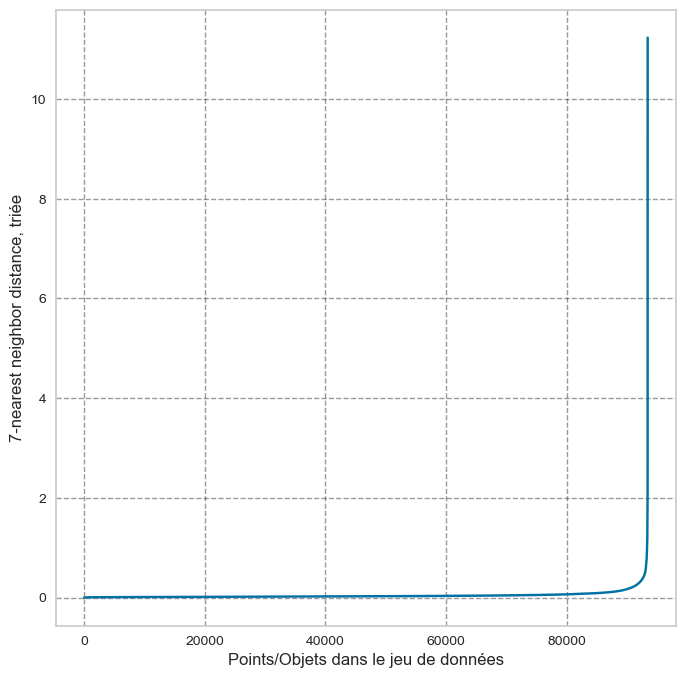

In [21]:
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(X)

    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8, 8))
    plt.plot(distances)
    plt.xlabel('Points/Objets dans le jeu de données', fontsize=12)
    plt.ylabel('{}-nearest neighbor distance, triée'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2 * RFM_Table_scaled.shape[-1] - 1 # Nous initialisons avec 2 fois la dimension du tableau - 1
get_kdist_plot(X=RFM_Table_scaled, k=k) 


Il faut "zoomer" pour déterminer le coude, cependant, suite à ce graph, le DBSCAN parait compromis.

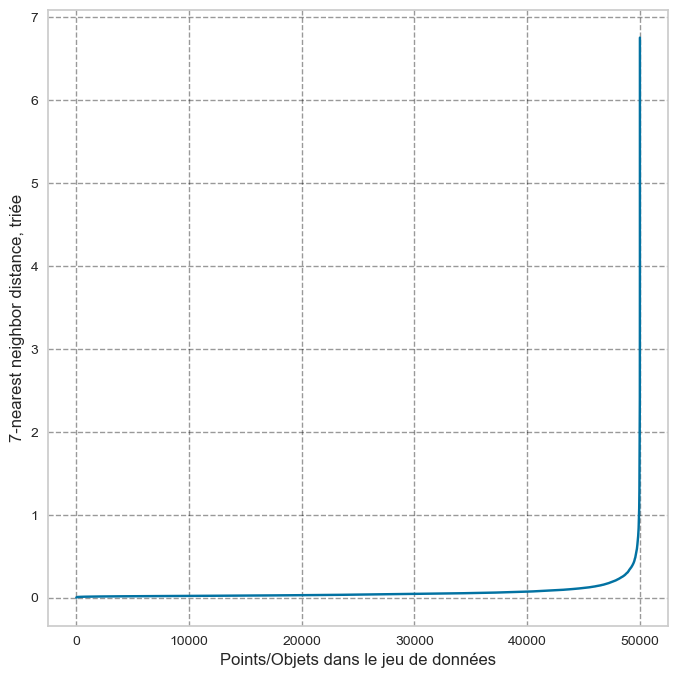

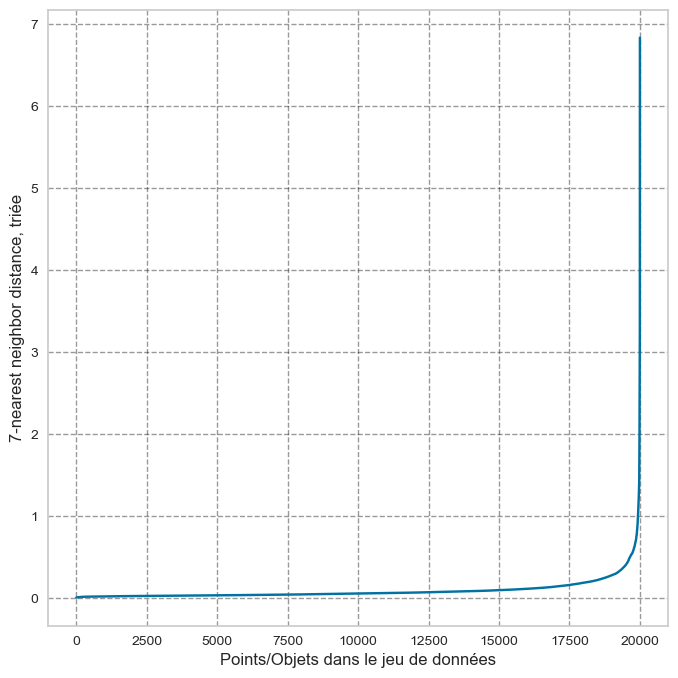

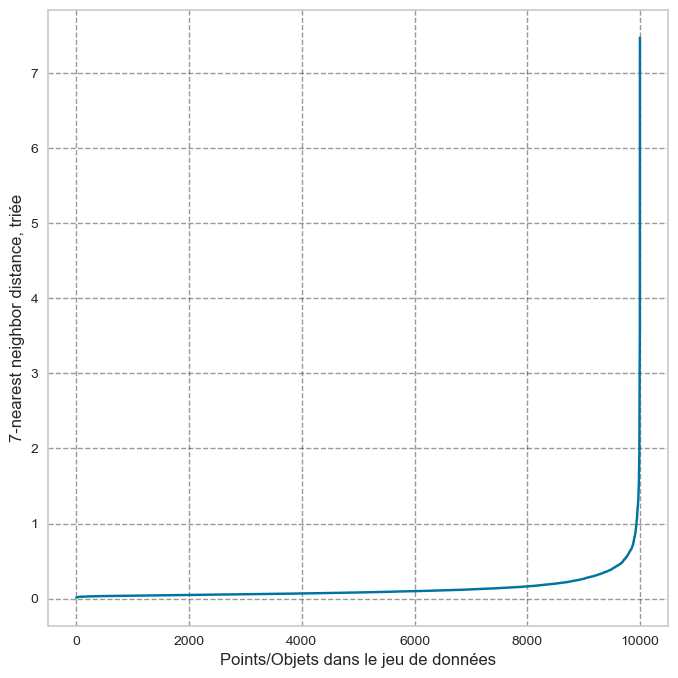

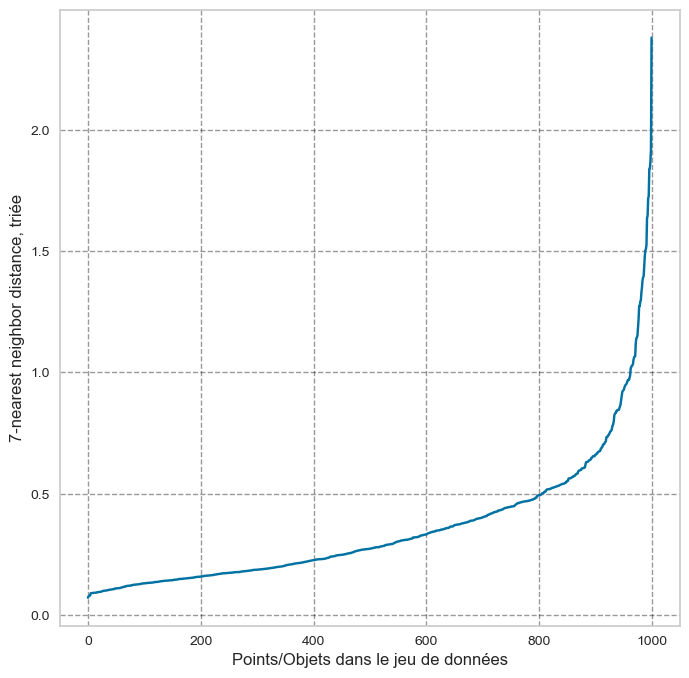

In [22]:
get_kdist_plot(X=RFM_Table_scaled[:50000], k=k) # zoom
get_kdist_plot(X=RFM_Table_scaled[:20000], k=k) # zoom
get_kdist_plot(X=RFM_Table_scaled[:10000], k=k) # zoom
get_kdist_plot(X=RFM_Table_scaled[:1000], k=k) # zoom

Nous selectionnons la valeur epsilon idéal entre 0.25 et 0.75 pour être souple. 

Nous initialisons la valeur min_samples à 80 clients, pour essayer de trouver des tendances utilisables.

Le score de silhouette est de :  0.025831181254696196


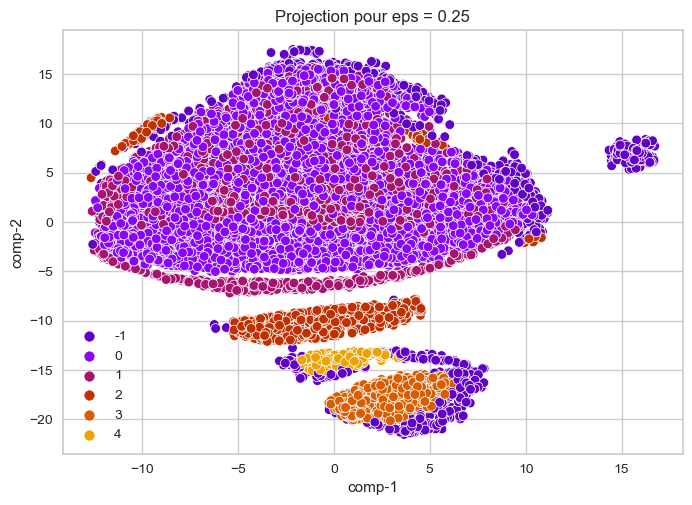

Recency Frequency Review Score    Monetary       
               mean    median         mean        mean  count
Cluster                                                      
-1       159.280147       1.0     3.154976  697.521789   9545
 0       242.666932       1.0     4.999971  161.816553  51551
 1       254.843576       1.0     4.000000  143.275516  16564
 2       286.247703       1.0     3.000000  130.108929   5987
 3       272.550624       1.0     1.000000  194.795727   8247
 4       299.157124       1.0     2.000000  113.997157   1502

Le score de silhouette est de :  0.23950828963904186


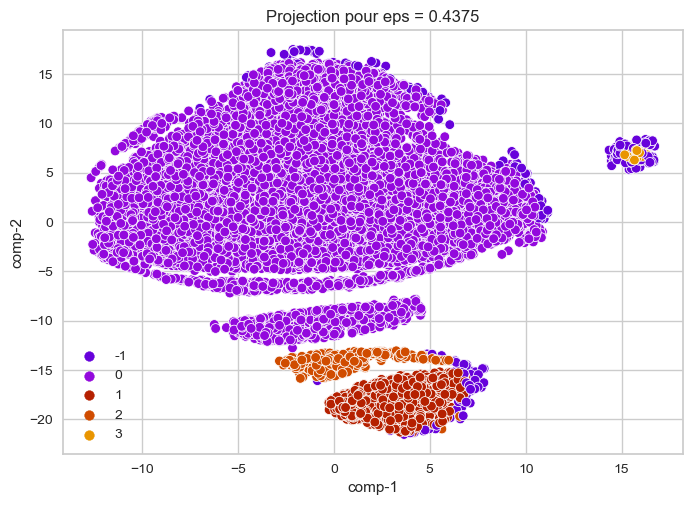

Recency Frequency Review Score     Monetary       
               mean    median         mean         mean  count
Cluster                                                       
-1       155.798812       1.0     3.134680  1308.537338   2863
 0       243.754086       1.0     4.586076   170.713525  77031
 1       248.996905       1.0     1.000000   234.462007   9692
 2       274.479769       1.0     2.000000   159.812064   2422
 3       260.348703       2.0     4.722738   269.082104   1388

Le score de silhouette est de :  0.45467188320805524


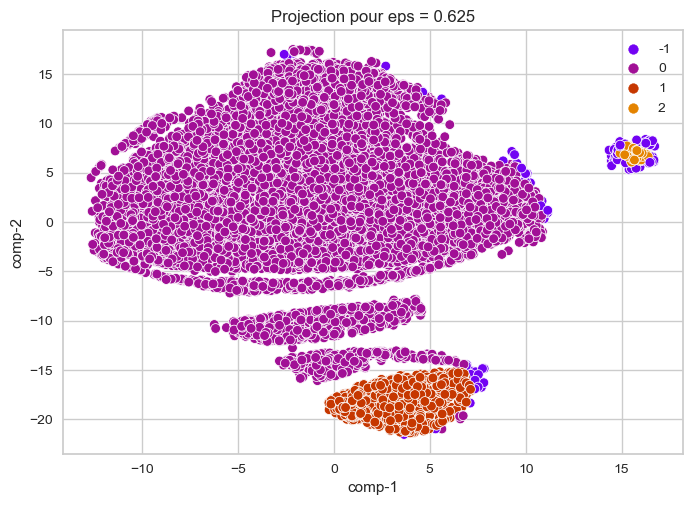

Recency Frequency Review Score     Monetary       
               mean    median         mean         mean  count
Cluster                                                       
-1       169.024076       2.0     2.992706  1962.736440   1163
 0       243.314087       1.0     4.492958   180.026262  80309
 1       246.597391       1.0     1.000000   258.971198   9888
 2       239.127701       2.0     4.490291   308.660953   2036

Le score de silhouette est de :  0.622747608048234


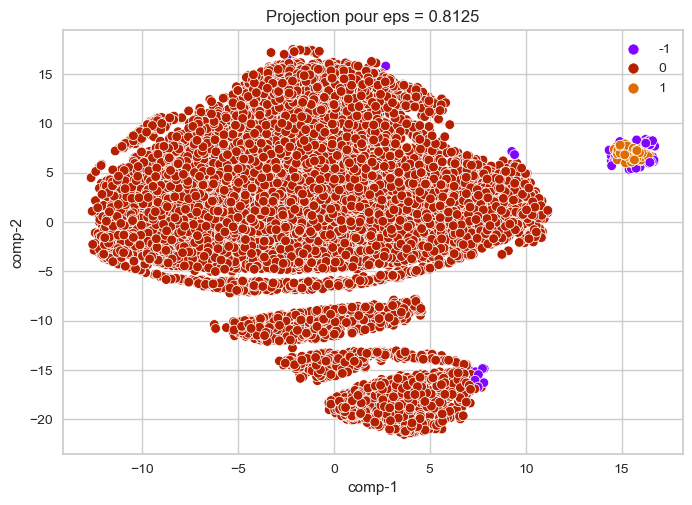

Recency Frequency Review Score     Monetary       
               mean    median         mean         mean  count
Cluster                                                       
-1       195.128748       2.0     2.971011  2483.778519    567
 0       243.312338       1.0     4.105245   195.588658  90479
 1       228.429787       2.0     4.345824   350.878251   2350

Le score de silhouette est de :  0.6258394796535537


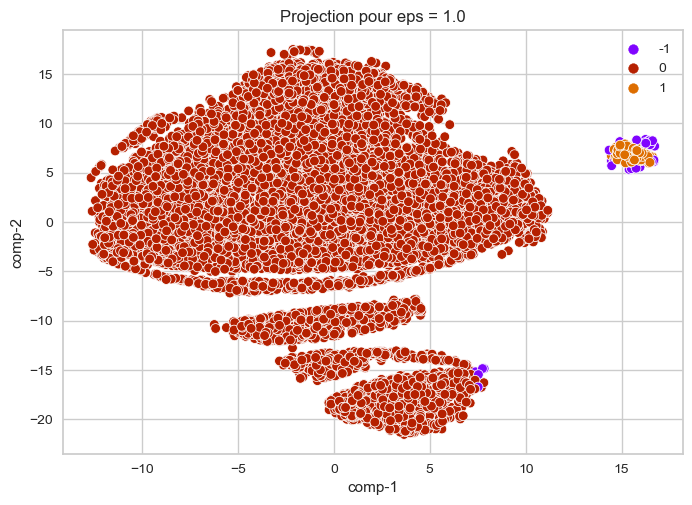

Recency Frequency Review Score     Monetary       
               mean    median         mean         mean  count
Cluster                                                       
-1       208.460916       3.0     3.359038  2794.411644    371
 0       243.205561       1.0     4.103747   198.337123  90552
 1       227.260817       2.0     4.240618   377.267533   2473

In [23]:
for epsilon in np.linspace(0.25, 1, 5):
    # Analyse sur plusieurs valeur d'epsilon
    DBSCAN_model = DBSCAN(eps=epsilon, min_samples=80)
    DBSCAN_y = DBSCAN_model.fit_predict(RFM_Table_scaled)


    # Création du tableau final
    rfm_df_true = rfm_df.copy()
    rfm_df_true['Cluster'] = DBSCAN_y
    df["y"] = DBSCAN_y[:10000]


    # Score de silhouette
    print("Le score de silhouette est de : ", silhouette_score(
        RFM_Table_scaled, DBSCAN_y, metric='euclidean'))

    # Visualisation
    sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                    palette=sns.color_palette(
        "gnuplot", rfm_df_true['Cluster'][:10000].unique().shape[-1]),
        data=df).set(title="Projection pour eps = {}".format(epsilon))
    plt.show()

    # Visualisation
    display(tableau_clustering(rfm_df_true))

Le score de silhouette est de :  0.11124075828698571


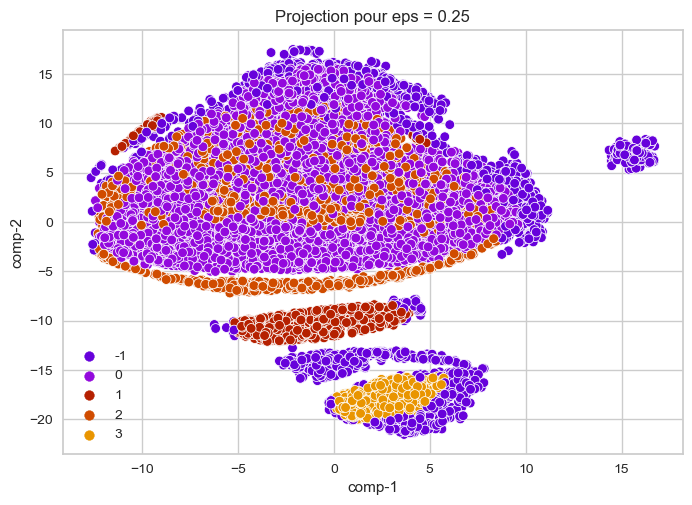

Recency Frequency Review Score    Monetary       
               mean    median         mean        mean  count
Cluster                                                      
-1       171.851683       1.0     3.145355  532.883729  16458
 0       245.768000       1.0     4.999990  150.526176  50306
 1       297.282963       1.0     3.000000  111.247489   5089
 2       277.535947       1.0     4.000000  128.027678  14410
 3       274.498668       1.0     1.000000  164.859798   7133

Le score de silhouette est de :  0.2777059659501649


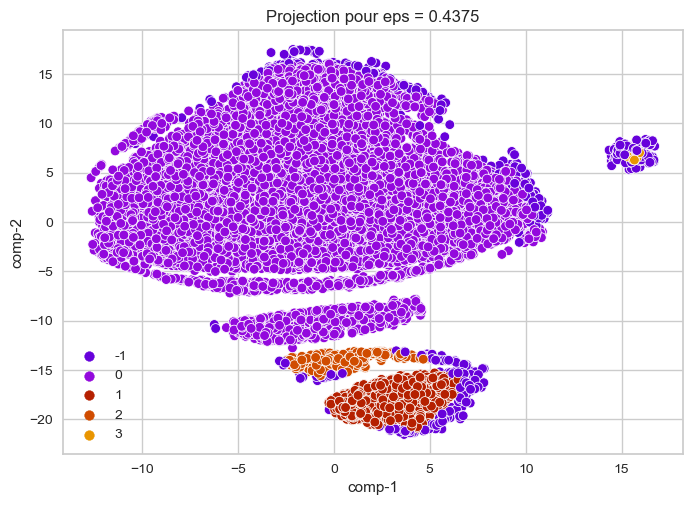

Recency Frequency Review Score    Monetary       
               mean    median         mean        mean  count
Cluster                                                      
-1       150.808462       1.0     3.170480  910.421264   5743
 0       246.143703       1.0     4.600603  162.883778  75788
 1       257.811994       1.0     1.000000  209.666451   9138
 2       286.488528       1.0     2.000000  137.675497   2092
 3       292.996850       2.0     4.937297  239.997228    635

Le score de silhouette est de :  0.4710988801461137


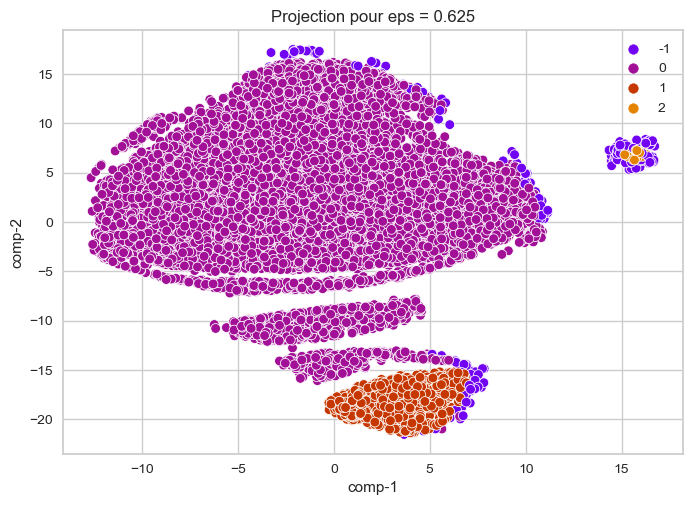

Recency Frequency Review Score     Monetary       
               mean    median         mean         mean  count
Cluster                                                       
-1       161.062162       2.0     3.132918  1322.717938   2590
 0       244.276317       1.0     4.504335   173.012956  79702
 1       248.347871       1.0     1.000000   239.909832   9745
 2       261.584253       2.0     4.762321   276.889706   1359

Le score de silhouette est de :  0.6105443474356519


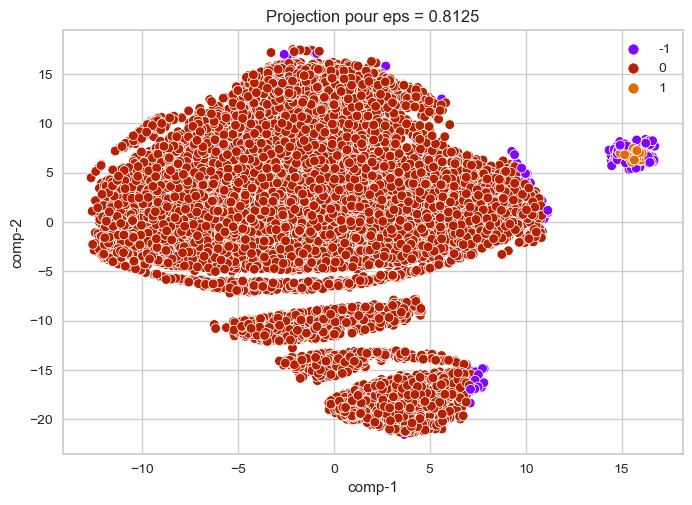

Recency Frequency Review Score     Monetary       
               mean    median         mean         mean  count
Cluster                                                       
-1       166.853218       2.0     3.092437  1712.636739   1383
 0       243.707796       1.0     4.110160   188.651354  90187
 1       247.575027       2.0     4.587026   299.592700   1826

Le score de silhouette est de :  0.6240670228395762


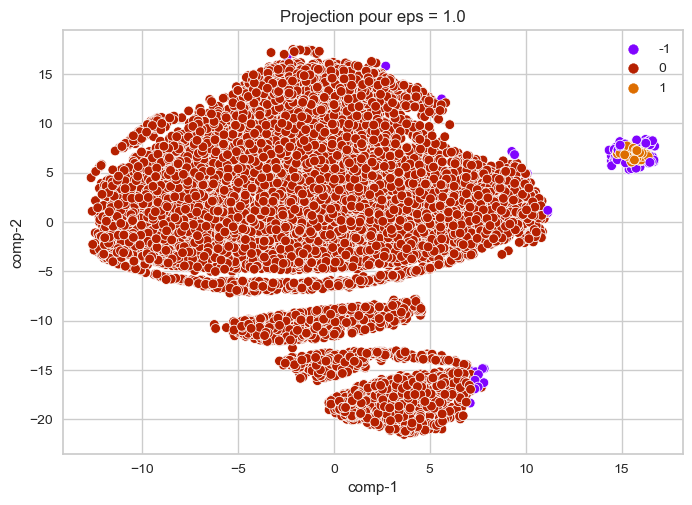

Recency Frequency Review Score     Monetary       
               mean    median         mean         mean  count
Cluster                                                       
-1       179.415212       2.0     3.054071  2169.807257    802
 0       243.365249       1.0     4.106054   193.383545  90426
 1       236.009225       2.0     4.424532   324.006748   2168

In [24]:
for epsilon in np.linspace(0.25, 1, 5):
    # Analyse sur plusieurs valeur d'epsilon
    DBSCAN_model = DBSCAN(eps=epsilon, min_samples=100, metric = "manhattan")
    DBSCAN_y = DBSCAN_model.fit_predict(RFM_Table_scaled)


# Création du tableau final
    rfm_df_true = rfm_df.copy()
    rfm_df_true['Cluster'] = DBSCAN_y
    df["y"] = DBSCAN_y[:10000]

# Score de silhouette
    print("Le score de silhouette est de : ", silhouette_score(
        RFM_Table_scaled, DBSCAN_y, metric='manhattan'))

# Visualisation
    sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                    palette=sns.color_palette(
                        "gnuplot", rfm_df_true['Cluster'][:10000].unique().shape[-1]),
                    data=df).set(title="Projection pour eps = {}".format(epsilon))
    plt.show()
# Visualisation
    display(tableau_clustering(rfm_df_true))

## Bisecting KMeans

Recency Frequency Review Score    Monetary       
               mean    median         mean        mean  count
Cluster                                                      
0        223.539427       2.0     4.164785  490.358778   2790
1         61.177722       1.0     4.371645  259.552137  21573
2        305.099767       1.0     4.735897  169.042393  51851
3        296.159811       1.0     3.000000  171.794525   6126
4        279.001447       1.0     1.218117  284.432243  11056

Le score de silhouette est de :  0.23559422244065129


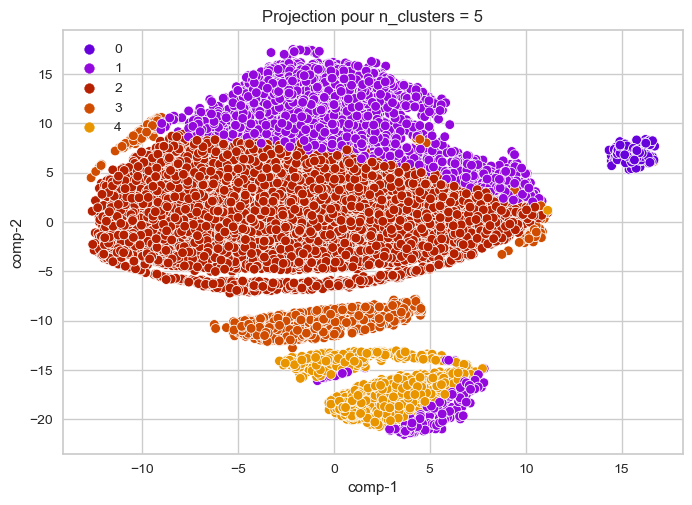

In [25]:
from sklearn.cluster import BisectingKMeans
# Entrainement sur 5 clusters
BisectingKMeans_model = BisectingKMeans(n_clusters=5)
BisectingKMeans_y = BisectingKMeans_model.fit_predict(RFM_Table_scaled)


# Création du tableau final
rfm_df_true = rfm_df.copy()
rfm_df_true['Cluster'] = BisectingKMeans_y

# Affichage
display(tableau_clustering(rfm_df_true))

print("Le score de silhouette est de : ", silhouette_score(
    RFM_Table_scaled, BisectingKMeans_y, metric='euclidean'))

    
# Visualisation
df["y"] = BisectingKMeans_y[:10000]
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette(
    "gnuplot", rfm_df_true['Cluster'][:10000].unique().shape[-1]),
    data=df).set(title="Projection pour n_clusters = 5")
plt.show()

## GaussianMixture

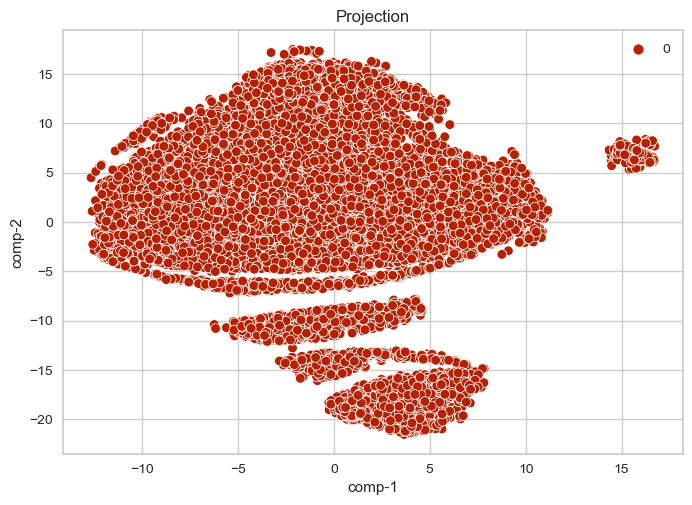

Recency Frequency Review Score    Monetary       
               mean    median         mean        mean  count
Cluster                                                      
0        242.645349       1.0     4.104413  213.387431  93396

In [26]:
# Entrainement du model
GaussianMixture_model = GaussianMixture()
GaussianMixture_y = GaussianMixture_model.fit_predict(RFM_Table_scaled)

# Création du tableau final
rfm_df_true = rfm_df.copy()
rfm_df_true['Cluster'] = GaussianMixture_y

# Visualisation
df["y"] = GaussianMixture_y[:10000]
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette(
                    "gnuplot", rfm_df_true['Cluster'][:10000].unique().shape[-1]),

                data=df).set(title="Projection")
plt.show()

# Visualisation
display(tableau_clustering(rfm_df_true))

## Sélection du modèle

Nous choisissons le modèle KMeans à 5 clusters, pour sa rapidité, et son interprétabilité sur ce jeu de données.

Recency Frequency Review Score    Monetary       
               mean    median         mean        mean  count
Cluster                                                      
0        281.014540       1.0     4.547658  424.334409  23522
1        299.326077       1.0     4.553243   73.937378  38540
2        249.421581       1.0     1.186571  276.571417  12242
3         50.920479       1.0     4.587197  143.861177  16285
4        225.648379       2.0     4.152209  488.145860   2807

Le score de silhouette est de :  0.35661616046443945


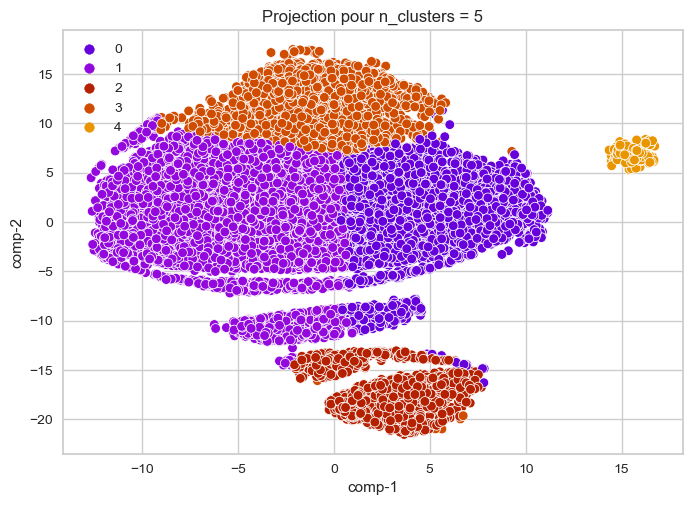

In [27]:
# Entrainement sur 5 clusters
kmean_model = KMeans(n_clusters=5)
kmean_y = kmean_model.fit_predict(RFM_Table_scaled)


# Création du tableau final
rfm_df_true = rfm_df.copy()
rfm_df_true['Cluster'] = kmean_y

# Affichage
display(tableau_clustering(rfm_df_true))


# Score silhouette

print("Le score de silhouette est de : ", silhouette_score(
    RFM_Table_scaled, kmean_y, metric='euclidean'))

# Visualisation
df["y"] = kmean_y[:10000]
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette(
    "gnuplot", rfm_df_true['Cluster'][:10000].unique().shape[-1]),
    data=df).set(title="Projection pour n_clusters = 5")
plt.show()